# Data Quality Control + Clustering + Pseudotime Analysis

In [1]:
# import packages 
import pandas as pd 
import numpy as np
import randomly
import anndata2ri
import scanpy as sc 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# read the preprocess data: 
adata = sc.read_h5ad('EpCAM_adata.gz')

In [3]:
adata

AnnData object with n_obs × n_vars = 8277 × 32285
    obs: 'seq_folder', 'nUMI', 'nGene', 'log10GenesPerUMI', 'mitoRatio', 'cells', 'sample', 'ident'
    layers: 'logcounts'

In [10]:
# filter condition: 
filter_condition = adata.obs.loc[(adata.obs.nUMI >= 1) & (adata.obs.nUMI <=100000) & \
                                 (adata.obs.nGene >= 100) & (adata.obs.log10GenesPerUMI > 0.5) & \
                                 (adata.obs.log10GenesPerUMI <0.9)&\
                                 (adata.obs.mitoRatio<0.2)]

In [11]:
filter_condition

,seq_folder,nUMI,nGene,log10GenesPerUMI,mitoRatio,cells,sample,ident
AAACCCAAGAAACACT-1,mSG_EpCAM,30236.0,5516.0,0.835086,0.090521,AAACCCAAGAAACACT-1,mSG,mSG_EpCAM
AAACCCAGTACAAGTA-1,mSG_EpCAM,5871.0,970.0,0.792518,0.182081,AAACCCAGTACAAGTA-1,mSG,mSG_EpCAM
AAACGAACACAAGCCC-1,mSG_EpCAM,13959.0,3305.0,0.849046,0.115768,AAACGAACACAAGCCC-1,mSG,mSG_EpCAM
AAACGCTAGAGATCGC-1,mSG_EpCAM,30771.0,4347.0,0.810623,0.089955,AAACGCTAGAGATCGC-1,mSG,mSG_EpCAM
AAACGCTAGCGATTCT-1,mSG_EpCAM,6984.0,2232.0,0.871125,0.048540,AAACGCTAGCGATTCT-1,mSG,mSG_EpCAM
...,...,...,...,...,...,...,...,...
TTTGTTGAGCTAGAAT-1,mSG_EpCAM,11702.0,3273.0,0.863992,0.109127,TTTGTTGAGCTAGAAT-1,mSG,mSG_EpCAM
TTTGTTGAGGAAACGA-1,mSG_EpCAM,23955.0,3366.0,0.805388,0.107201,TTTGTTGAGGAAACGA-1,mSG,mSG_EpCAM
TTTGTTGGTGGCTAGA-1,mSG_EpCAM,19948.0,4057.0,0.839137,0.178364,TTTGTTGGTGGCTAGA-1,mSG,mSG_EpCAM
TTTGTTGGTGTGTCCG-1,mSG_EpCAM,28251.0,3838.0,0.805230,0.103430,TTTGTTGGTGTGTCCG-1,mSG,mSG_EpCAM


In [106]:
df_filter = pd.DataFrame(adata[filter_condition.index,:].X.toarray().copy())
df_filter.columns = adata.var_names
df_filter.index = filter_condition.index
df_filter.head()

,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37587,Gm37323,Mrpl15,Lypla1,...,Gm16367,AC163611.1,AC163611.2,AC140365.1,AC124606.2,AC124606.1,AC133095.2,AC133095.1,AC234645.1,AC149090.1
AAACCCAAGAAACACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
AAACCCATCTTTCAGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
AAACGAACACAAGCCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
AAACGCTAGAGATCGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AAACGCTAGCGATTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [40]:
adata_filter = adata[filter_condition.index,:].copy()
df_filter = pd.DataFrame(adata_filter.X.toarray())
df_filter.index = filter_condition.index
df_filter.columns = adata_filter.var_names

### Using Randomly 

In [41]:
model = randomly.Rm()
model.preprocess(df_filter, min_tp=0, 
                    min_genes_per_cell=0, 
                    min_cells_per_gene=0,
                    refined=True)

Run the refining function


In [42]:
model.refining(min_trans_per_gene=7)

3699  cells and  13245  genes


In [43]:
model.fit()

Preprocessed data is being used for fitting


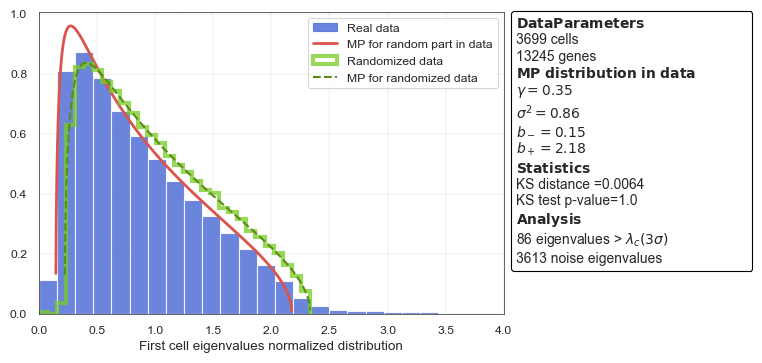

In [44]:
model.plot_mp()

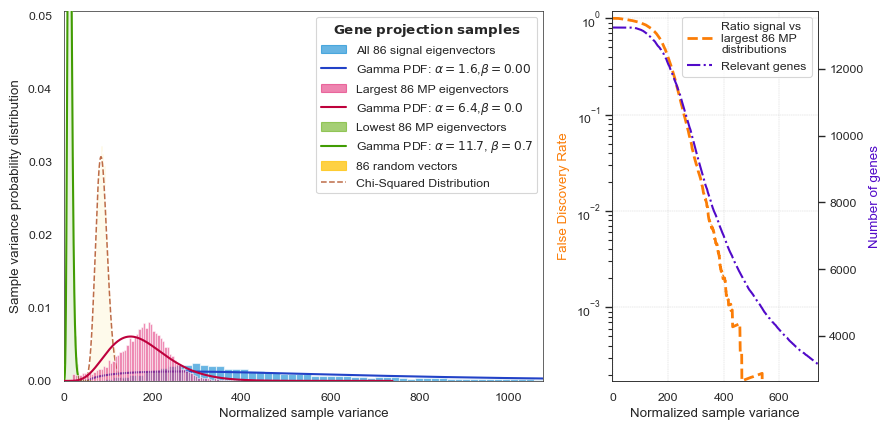

In [45]:
model.plot_statistics()

computing t-SNE, using Multicore t-SNE for 4 jobs
atribute embedding is updated with t-SNE coordinates


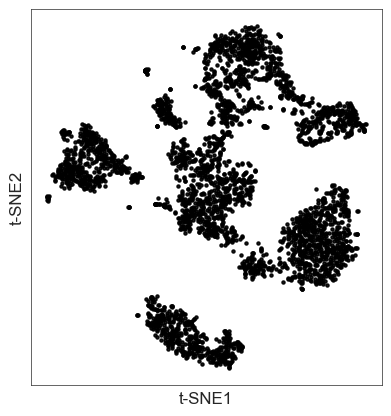

In [56]:
model.fit_tsne(fdr=0.0001)
model.plot()

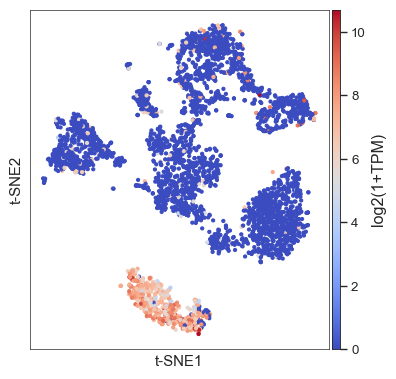

In [58]:
model.plot(gene=["Lpo"], size=4)

In [59]:
df_clean = model.return_cleaned(fdr=0.0001)

In [62]:
# create a new anndata object: 
adata_filter = sc.AnnData(df_clean, obs = filter_condition)

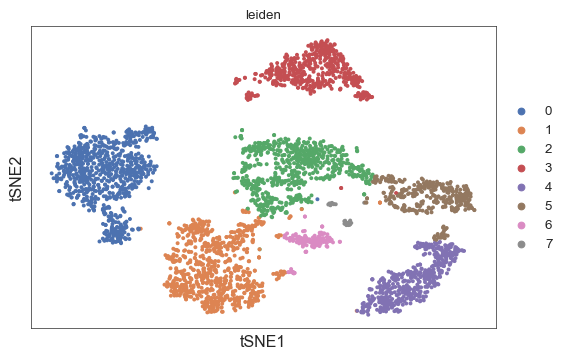

In [93]:
# default setting 
sc.tl.pca(adata_filter, svd_solver = "arpack")
sc.pp.neighbors(adata_filter)
sc.tl.tsne(adata_filter)
sc.tl.leiden(adata_filter, resolution = 0.3)
sc.pl.tsne(adata_filter, color = "leiden")

In [64]:
# evaluate the cluster 
from sklearn.metrics import silhouette_score
X = pd.DataFrame(adata_filter.X)
labels = adata_filter.obs["leiden"]
silhouetee_score_leiden02 = silhouette_score(X, labels)

In [38]:
silhouetee_score_leiden02

0.25996825

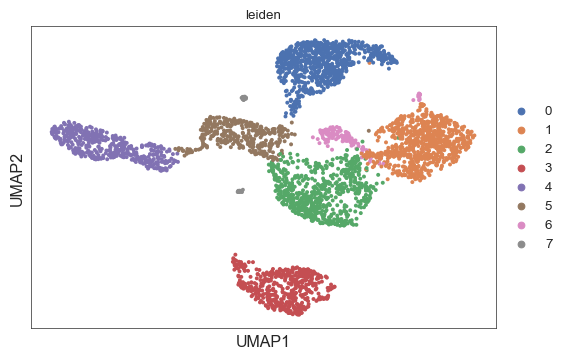

In [65]:
# UMAP 
sc.tl.pca(adata_filter, svd_solver = "arpack")
sc.tl.umap(adata_filter)
sc.pl.umap(adata_filter, color = "leiden")

### searching for the best parameters: 

In [84]:
from sklearn.metrics import silhouette_score

def search_params(params):
    ks = params["n_neighbors"]
    ress = params["resolutions"]
    silhouetee_scores = []
    num_clusters = []
    
    X = pd.DataFrame(adata_filter.X)
    
    for k in ks:
        cur_l = [] # store silhouette score when n_neighbours = k 
        cur_n =[] # store number of clusters when n_neighbours = k 
        for res in ress:
            sc.pp.neighbors(adata_filter, n_neighbors=k)
            sc.tl.tsne(adata_filter)
            sc.tl.leiden(adata_filter,resolution = res)
            # sc.pl.tsne(adata_filter, color = "leiden")
            labels = adata_filter.obs["leiden"]
            c_num = max(labels.astype(int))+1 
            cur_l.append(silhouette_score(X, labels))
            cur_n.append(c_num)
            
        silhouetee_scores.append(cur_l)
        num_clusters.append(cur_n)
        
    best_pos = np.argmax(np.array(silhouetee_scores))
    k = best_pos // len(ress)
    r = best_pos % len(ress)
    
    return {"best_neighbor":ks[k],"best_resolution":ress[r],\
            "silhouetee_scores":silhouetee_scores, "num_clusters":num_clusters}

# store = search_params(params = {"n_neighbors":[20,30,40,50,60,70,80,90,100], "resolutions":[0.2, 0.3, 0.4, 0.5, 0.6, 0.7]})

In [85]:
store = search_params(params = {"n_neighbors":[15], "resolutions":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]})

In [86]:
store

{'best_neighbor': 15,
 'best_resolution': 0.2,
 'silhouetee_scores': [[0.24764657,
   0.2593048,
   0.25713974,
   0.2339721,
   0.19349293,
   0.20128974,
   0.18300508]],
 'num_clusters': [[7, 8, 8, 10, 11, 13, 14]]}

## Trajectory 

### ACINAR2 - 3 

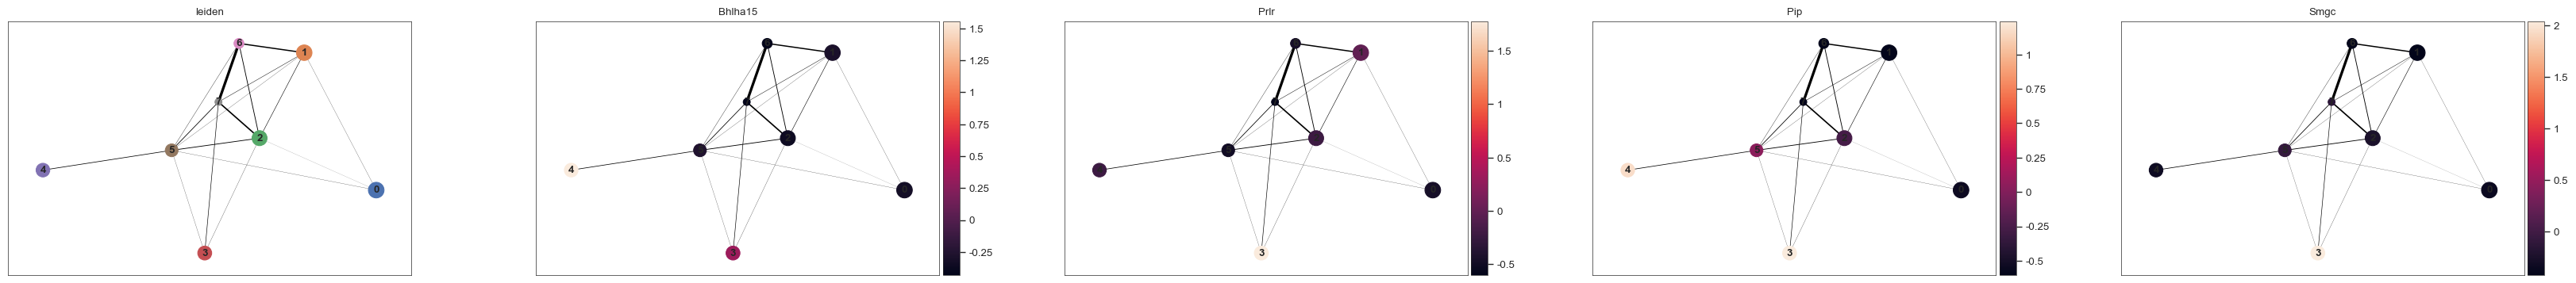

In [94]:
sc.tl.paga(adata_filter, groups='leiden')
sc.pl.paga(adata_filter, color = ['leiden',"Bhlha15", "Prlr","Pip","Smgc"])

### ACINAR1 - 4

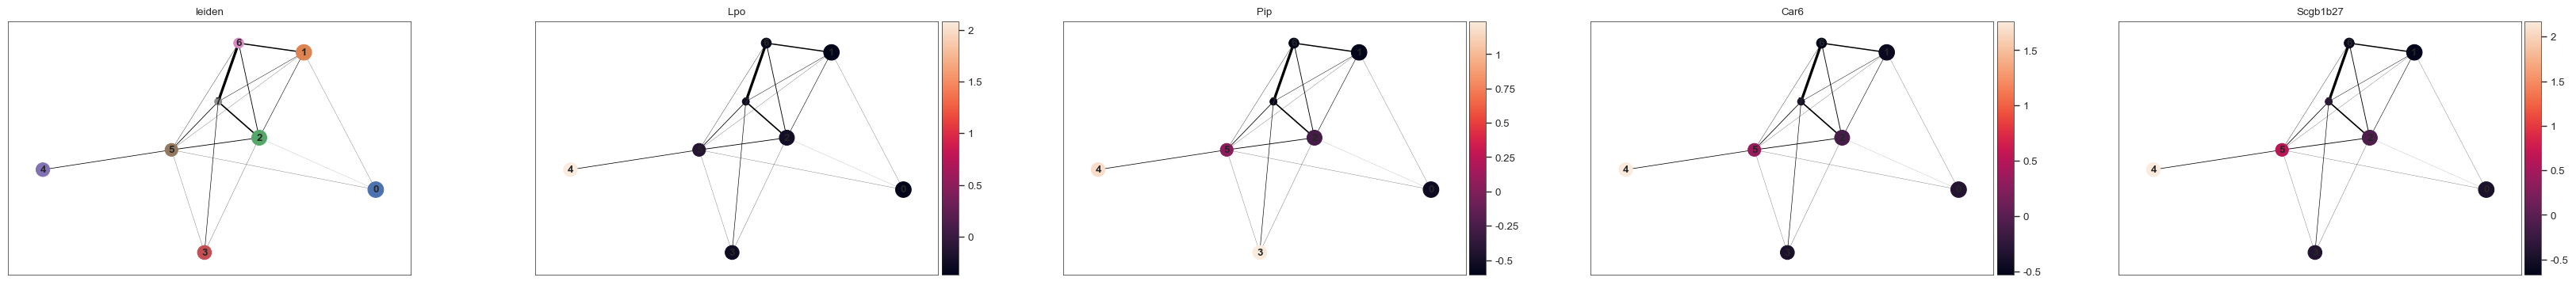

In [95]:
sc.pl.paga(adata_filter, color = ['leiden', "Lpo", "Pip", "Car6", "Scgb1b27"])

### Ductal 1 - 1 

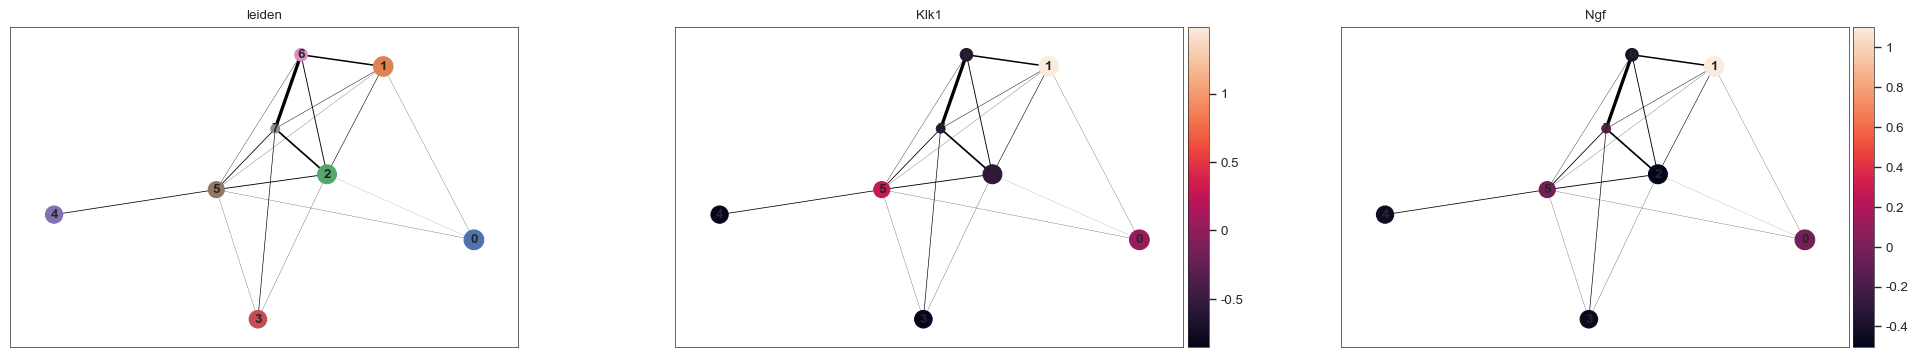

In [96]:
# Ductal 1 
sc.tl.paga(adata_filter, groups='leiden')
sc.pl.paga(adata_filter, color = ['leiden',"Klk1", "Ngf"])

### Ductal 2 - 0

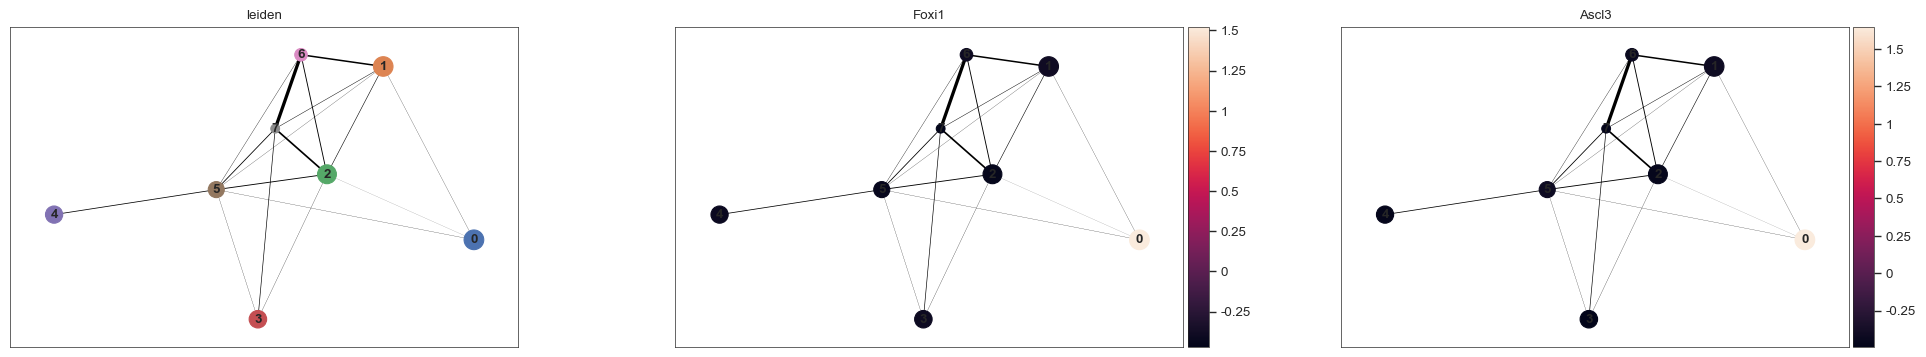

In [97]:
sc.pl.paga(adata_filter, color = ['leiden',"Foxi1", "Ascl3"])

### Ductal 3 - 2

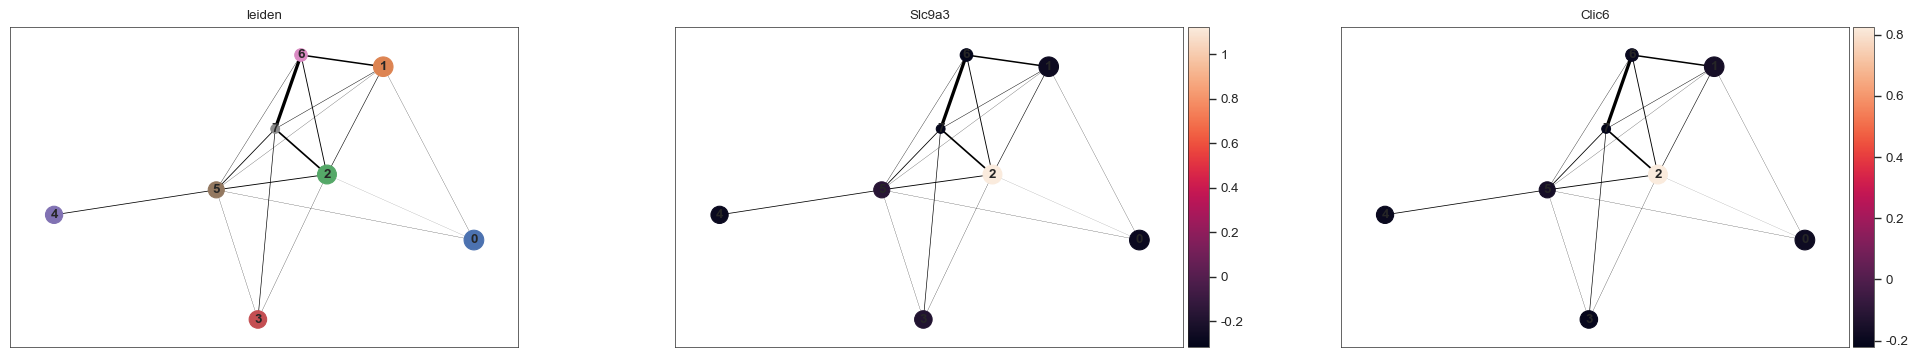

In [98]:
sc.pl.paga(adata_filter, color = ['leiden',"Slc9a3", "Clic6"])

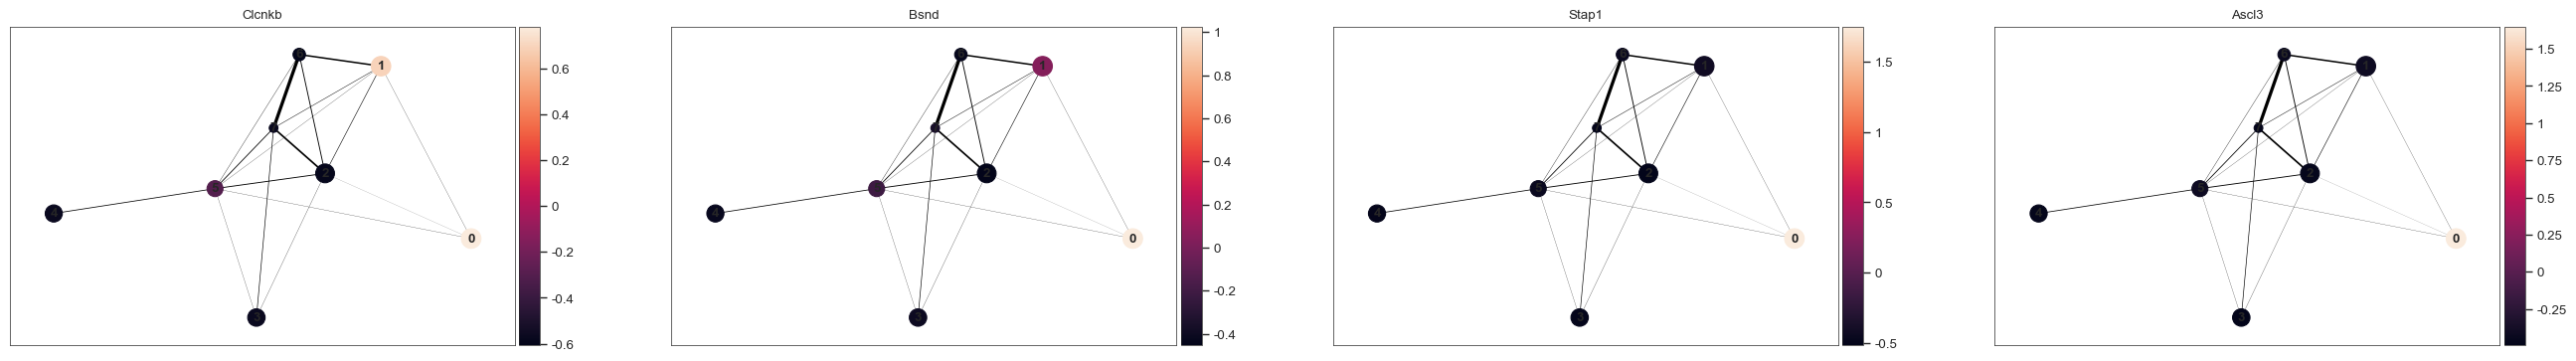

In [103]:
sc.pl.paga(adata_filter, color = ["Clcnkb", "Bsnd", "Stap1", "Ascl3"])

In [ ]:
sc.pl.paga(adata_filter, color = ["Clcnkb", "Bsnd"])

### Basal - 6

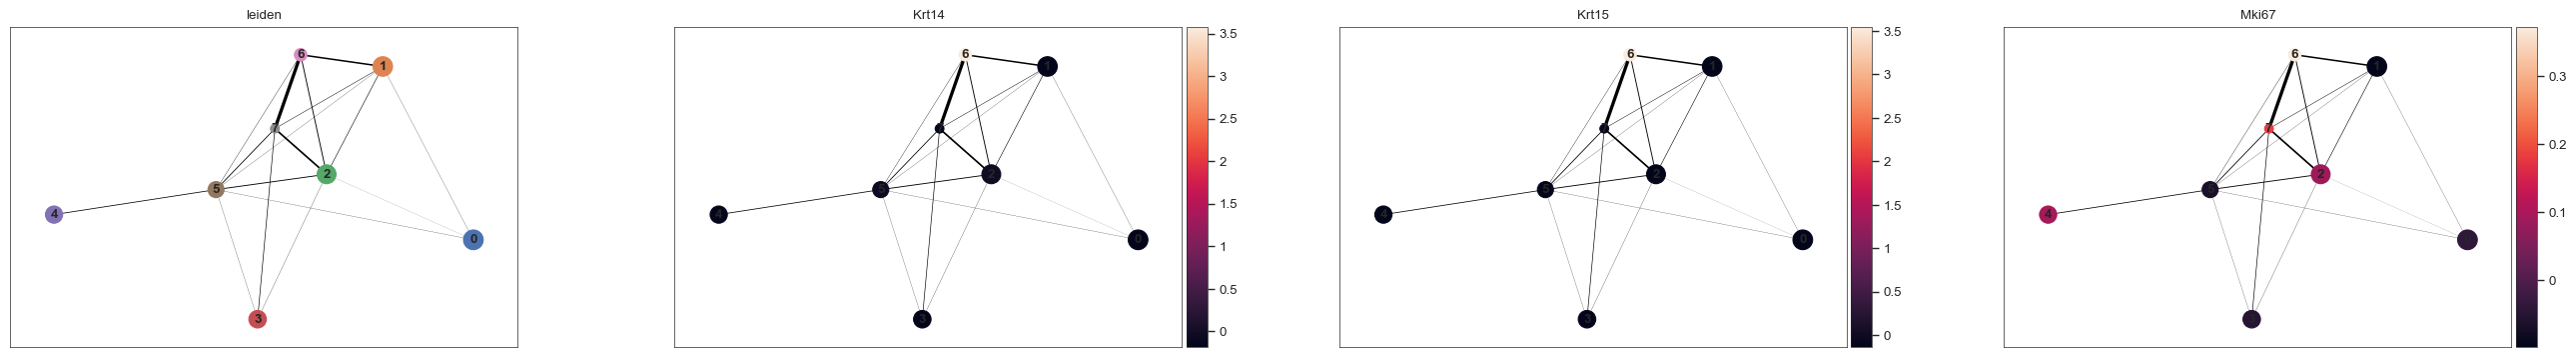

In [83]:
sc.pl.paga(adata_filter, color = ['leiden',"Krt14","Krt15", "Mki67"])

<Axes: >

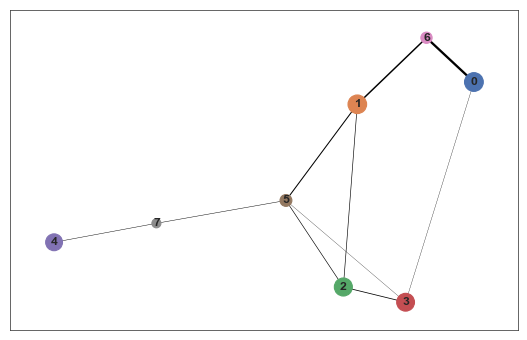

In [207]:
sc.tl.paga(adata_filter, groups='leiden')
sc.pl.paga(adata_filter, threshold=0.03, show=False)

In [75]:
sc.tl.draw_graph(adata_filter, init_pos='paga')

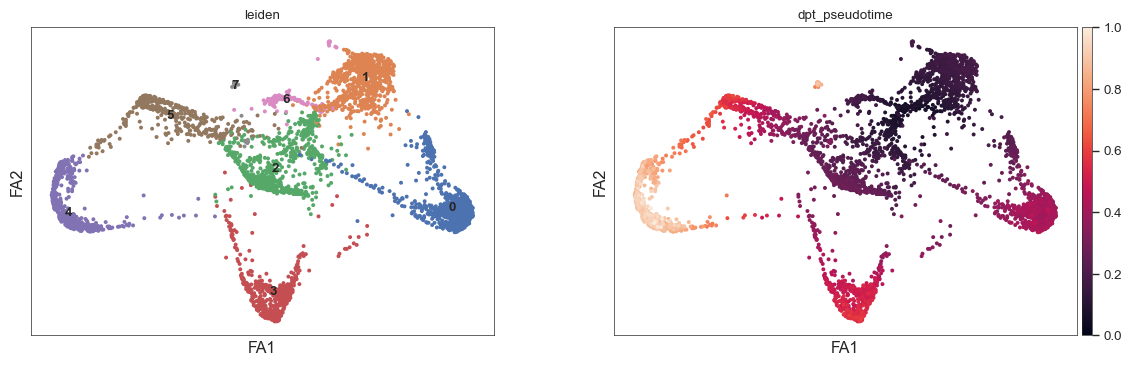

In [76]:
adata_filter.uns['iroot'] = np.flatnonzero(adata_filter.obs['leiden']  == '6')[0]
sc.tl.dpt(adata_filter)
sc.pl.draw_graph(adata_filter, color=['leiden', 'dpt_pseudotime'], legend_loc='on data')

In [77]:
adata_filter.obs["leiden_anno"] = adata_filter.obs["leiden"].map({})

AnnData object with n_obs × n_vars = 3699 × 5789
    obs: 'seq_folder', 'nUMI', 'nGene', 'log10GenesPerUMI', 'mitoRatio', 'cells', 'sample', 'ident', 'leiden', 'dpt_pseudotime'
    uns: 'pca', 'neighbors', 'tsne', 'leiden', 'leiden_colors', 'umap', 'paga', 'leiden_sizes', 'iroot', 'diffmap_evals', 'draw_graph'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_diffmap', 'X_draw_graph_fa'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'